<a href="https://colab.research.google.com/github/kangtaeksu/Trio/blob/main/00_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95_(Gradient_Descent)_(%EC%8B%A4%EC%8A%B5)%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 경사하강법 (Gradient Descent)

기본 개념은 함수의 기울기(경사)를 구하여 기울기가 낮은 쪽으로 계속 이동시켜서 극값에 이를 때까지 반복시키는 것입니다.

**비용 함수 (Cost Function 혹은 Loss Function)를 최소화**하기 위해 반복해서 파라미터를 업데이트 해 나가는 방식입니다.

In [ ]:
from IPython.display import YouTubeVideo, Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Image(url='https://img.pngio.com/scikit-learn-batch-gradient-descent-versus-stochastic-gradient-descent-png-592_319.png')

### 경사 하강법을 수학으로 쉽게 이해하기

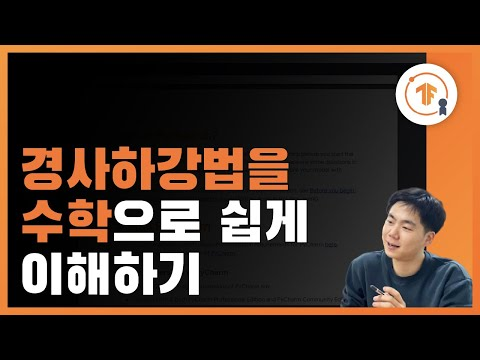

In [ ]:
YouTubeVideo('GEdLNvPIbiM')

### 경사 하강법을 활용한 파이썬 코드 구현

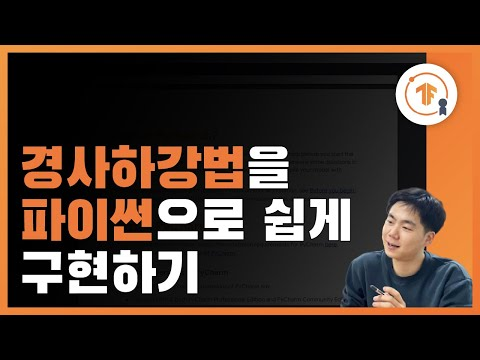

In [ ]:
YouTubeVideo('KgH3ZWmMxLE')

## 샘플에 활용할 데이터 셋 만들기

In [ ]:
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

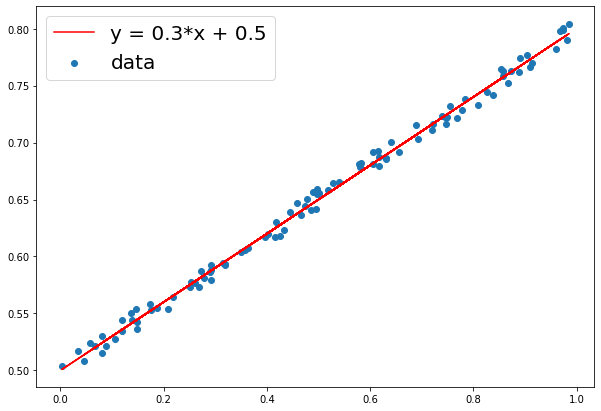

w: 0.3, b: 0.5


In [ ]:
x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

## 초기값 (Initializer)과 y_hat (예측, prediction) 함수 정의

w, b 값에 대하여 **random한 초기 값을 설정**해 줍니다.

In [ ]:
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)
print('랜덤한 값 생성 ==> w: {:.4f}, b: {:.4f}'.format(w, b))

랜덤한 값 생성 ==> w: 0.9671, b: 0.2599


`y_hat`은 `prediction`은 값 입니다. 즉, 가설함수에서 실제 값 (y)를 뺀 함수를 정의합니다.

In [ ]:
# Hypothesis 함수 정의
y_hat = w * x + b

## 오차(Error) 정의

Loss Function 혹은 Cost Function을 정의 합니다.

Loss (Cost) Function은 예측값인 `y_hat`과 `y`의 차이에 **제곱**으로 정의합니다.

제곱은 오차에 대한 음수 값을 허용하지 않으며, 이는 **Mean Squared Error(MSE)**인 평균 제곱 오차 평가 지표와 관련 있습니다.

In [ ]:
# Cost (Loss) Function 정의
error = ((y_hat - y) ** 2).mean()

## 학습률 (Learning Rate)

In [ ]:
Image(url='https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/images/lr1.png', width=950)

한 번 학습할 때 **얼마만큼 가중치(weight)를 업데이트** 해야 하는지 학습 양을 의미합니다.

너무 큰 학습률 (Learning Rate)은 가중치 갱신이 크게 되어 **자칫 Error가 수렴하지 못하고 발산**할 수 있으며,

너무 작은 학습률은 가중치 갱신이 작게 되어 **가중치 갱신이 충분히 되지 않고, 학습이 끝나** 버릴 수 있습니다. 즉 과소 적합되어 있는 상태로 남아 있을 수 있습니다.



## Gradient Descent 구현 (단항식)

In [ ]:
# 최대 반복 횟수
num_epoch = 5000

# 학습율 (learning_rate)
learning_rate = 0.5

In [ ]:
errors = []
# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # Hypothesis 정의
    y_hat = w * x + b
    
    # Cost (Loss) Function 정의
    error = ((y_hat - y) ** 2).mean()
    if error < 0.00005:
        break
    # Gradient 미분 계산
    # 이것은 미분한 것에 알파값(학습률)을 곱하여 오차를 0이 될 때까지 줄여가는 것
    w = w - learning_rate * ((y_hat - y) * x).mean()
    b = b - learning_rate * (y_hat - y).mean()
    
    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
    
print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.52243, b = 0.45539 error = 0.04272
 5 w = 0.46421, b = 0.41343 error = 0.00231
10 w = 0.44015, b = 0.42576 error = 0.00170
15 w = 0.41975, b = 0.43663 error = 0.00125
20 w = 0.40233, b = 0.44591 error = 0.00092
25 w = 0.38744, b = 0.45384 error = 0.00068
30 w = 0.37472, b = 0.46062 error = 0.00051
35 w = 0.36385, b = 0.46642 error = 0.00038
40 w = 0.35456, b = 0.47136 error = 0.00029
45 w = 0.34662, b = 0.47559 error = 0.00022
50 w = 0.33984, b = 0.47921 error = 0.00017
55 w = 0.33404, b = 0.48229 error = 0.00013
60 w = 0.32909, b = 0.48493 error = 0.00011
65 w = 0.32486, b = 0.48719 error = 0.00009
70 w = 0.32125, b = 0.48911 error = 0.00007
75 w = 0.31816, b = 0.49076 error = 0.00006
80 w = 0.31552, b = 0.49217 error = 0.00005
------------------------------------------------------------
84 w = 0.3, b = 0.5 error = 0.00005


**시각화**

학습 진행(epoch)에 따른 오차를 시각화 합니다.

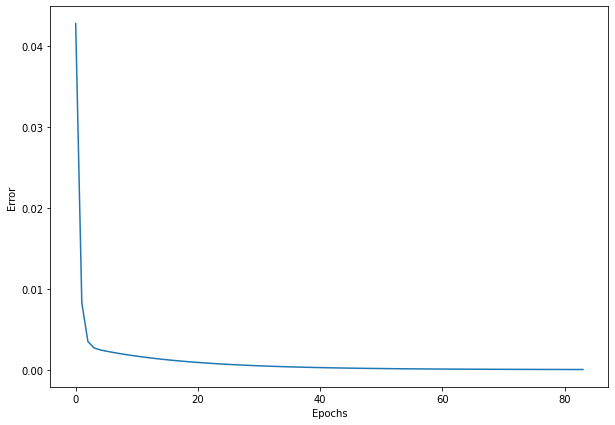

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

## 다항식

**샘플 데이터**를 생성합니다.

이번에는 Feature Data, 즉 X 값이 여러 개인 다항식의 경우에 대해서도 구해보도록 하겠습니다.

다항식에서는 X의 갯수 만큼, W 갯수도 늘어날 것입니다.

다만, bias (b)의 계수는 1개인 점에 유의해 주세요.

In [ ]:
x1 = np.random.rand(100)
x2 = np.random.rand(100)
x3 = np.random.rand(100)

**다항식을 정의**합니다.

In [ ]:
# w1: 0.3
# w2: 0.5
# w3: 0.7
# b:  0.9

In [ ]:
y = 0.3 * x1 + 0.5 * x2 + 0.7 * x3 + 0.9

## Gradient Descent 구현 (다항식)

In [ ]:
errors = []
w1_grad = []
w2_grad = []
w3_grad = []

num_epoch=5000
learning_rate=0.5

# 랜덤한 w1, w2, w3, b를 생성합니다.
w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
w3 = np.random.uniform(low=0.0, high=1.0)

b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    # 예측값
    y_hat = w1 * x1 + w2 * x2 + w3 * x3 + b
    # Cost 계산
    error = ((y_hat - y) ** 2).mean()
    if error < 0.00001:
        break

    # 미분값 적용 (Gradient)
    w1 = w1 - learning_rate * ((y_hat - y) * x1).mean()
    w2 = w2 - learning_rate * ((y_hat - y) * x2).mean()
    w3 = w3 - learning_rate * ((y_hat - y) * x3).mean()

    b = b - learning_rate * (y_hat - y).mean()
    
    w1_grad.append(w1)
    w2_grad.append(w2)
    w3_grad.append(w3)
    
    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, w3 = {3:.5f}, b = {4:.5f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))
    
print("----" * 15)
print("{0:2} w1 = {1:.1f}, w2 = {2:.1f}, w3 = {3:.1f}, b = {4:.1f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))

 0 w1 = 0.38940, w2 = 0.62288, w3 = 0.87119, b = 0.58812 error = 2.15501
 5 w1 = 0.40656, w2 = 0.63020, w3 = 0.88096, b = 0.66790 error = 0.00546
10 w1 = 0.39697, w2 = 0.61315, w3 = 0.86231, b = 0.69299 error = 0.00433
15 w1 = 0.38804, w2 = 0.59850, w3 = 0.84556, b = 0.71535 error = 0.00344
20 w1 = 0.37979, w2 = 0.58589, w3 = 0.83050, b = 0.73528 error = 0.00273
25 w1 = 0.37218, w2 = 0.57501, w3 = 0.81698, b = 0.75304 error = 0.00217
30 w1 = 0.36521, w2 = 0.56561, w3 = 0.80483, b = 0.76887 error = 0.00173
35 w1 = 0.35883, w2 = 0.55747, w3 = 0.79393, b = 0.78299 error = 0.00138
40 w1 = 0.35302, w2 = 0.55040, w3 = 0.78415, b = 0.79557 error = 0.00110
45 w1 = 0.34774, w2 = 0.54426, w3 = 0.77537, b = 0.80680 error = 0.00087
50 w1 = 0.34294, w2 = 0.53892, w3 = 0.76750, b = 0.81682 error = 0.00070
55 w1 = 0.33859, w2 = 0.53426, w3 = 0.76044, b = 0.82575 error = 0.00055
60 w1 = 0.33467, w2 = 0.53019, w3 = 0.75411, b = 0.83372 error = 0.00044
65 w1 = 0.33112, w2 = 0.52663, w3 = 0.74843, b = 0.

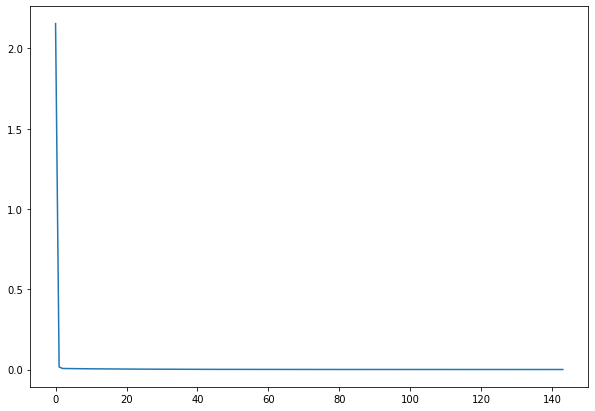

In [ ]:
plt.figure(figsize=(10, 7))

plt.plot(errors)

## 가중치 (W1, W2, W3) 값들의 변화량 시각화

`Epoch`가 지남에 따라 어떻게 가중치들이 업데이트 되는지 시각화 해 봅니다.

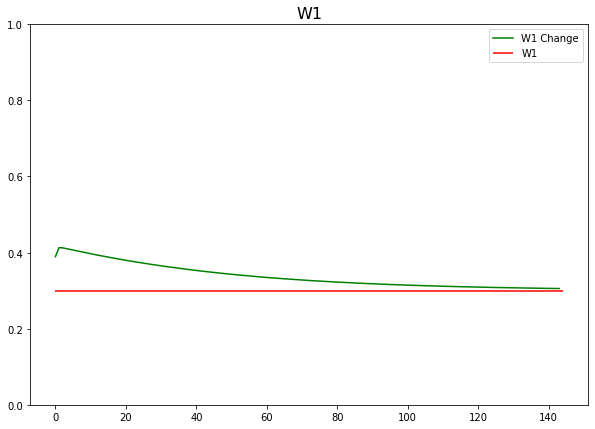

In [ ]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.3, xmin=0, xmax=len(w1_grad), color='r')
plt.plot(w1_grad, color='g')
plt.ylim(0, 1)
plt.title('W1', fontsize=16)
plt.legend(['W1 Change', 'W1'])
plt.show()

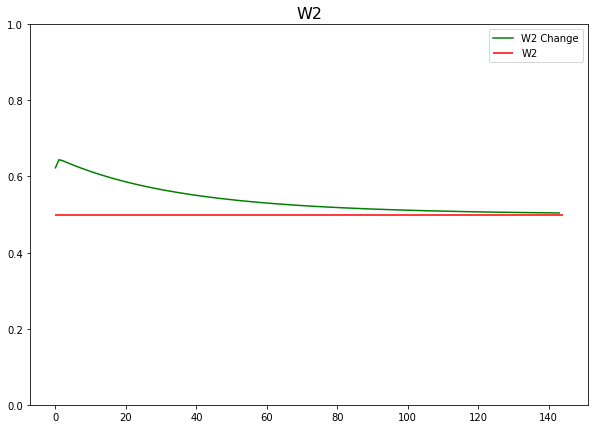

In [ ]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.5, xmin=0, xmax=len(w2_grad), color='r')
plt.plot(w2_grad, color='g')
plt.ylim(0, 1)
plt.title('W2', fontsize=16)
plt.legend(['W2 Change', 'W2'])
plt.show()

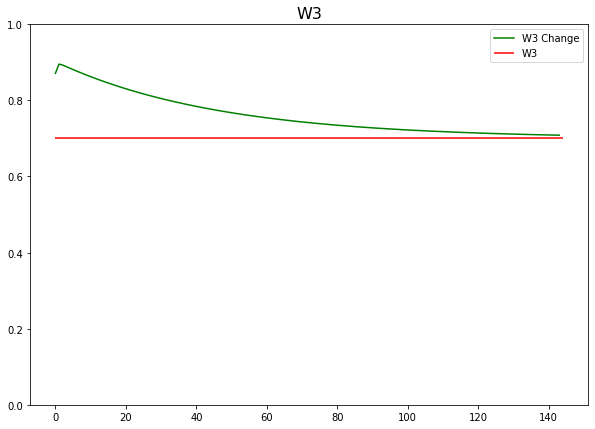

In [ ]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.7, xmin=0, xmax=len(w3_grad), color='r')
plt.plot(w3_grad, color='g')
plt.ylim(0, 1)
plt.title('W3', fontsize=16)
plt.legend(['W3 Change', 'W3'])
plt.show()